In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#getting and sorting data
data = np.loadtxt("/home/icvmuser/Downloads/3year-data-release/IC79-2010-events.txt", skiprows=1)
data = data[data[:,1].argsort()]  #Selects column number
data = data.transpose() #flipping array


In [ ]:
def null_values(x, y, unitperbin):
    np.random.seed(x)
    randomra = 360 * np.random.random_sample((1, 93133))

    xedges = np.linspace(0, 360, num=(360//unitperbin))
    yedges = np.linspace(-90, 90, num=(180//unitperbin))

    x = randomra[0]
    y = y

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [ ]:
null_vals_4 = null_values(0, data[4], 4)
null_vals_1 = null_values(0, )

In [ ]:
def average_nullvalues(x, y, unitperbin):
    a = null_values(0, y, unitperbin)
    c = np.arange(1, x)
    for item in c:
        b = null_values(item, y, unitperbin)
        a = np.add(a, b)
    average = a / x
    return average

In [ ]:
uf_avg_bckgd4 = average_nullvalues(10000, data[4], 4)
avg_bckgd4 = uf_avg_bckgd4.flatten()
uf_avg_bckgd1 = average_nullvalues(10000, data[4], 1)
avg_bckgd1 = uf_avg_bckgd1.flatten()
uf_avg_bckgd2 = average_nullvalues(10000, data[4], 2)
avg_bckgd2 = uf_avg_bckgd2.flatten()
uf_avg_bckgd6 = average_nullvalues(10000, data[4], 6)
avg_bckgd6 = uf_avg_bckgd6.flatten()
uf_avg_bckgd10 = average_nullvalues(10000, data[4], 10)
avg_bckgd10 = uf_avg_bckgd10.flatten()

In [ ]:
avg_bckgd

array([0.053 , 0.211 , 1.0719, ..., 3.1543, 1.6229, 0.4253])

In [ ]:
def null_chi_squared_withseed(x, y, z, unitperbin):
    a = null_values(x, y, unitperbin)
    b = z
    values = np.subtract(a, b)
    values = np.square(values)
    values = np.sum(values)
    return values

In [ ]:
def null_chi_squared_distrib(x, y, z, w, unitperbin):
    c = np.array([])
    a = np.arange(x, y)
    for item in a:
        b = null_chi_squared_withseed(item, z, w, unitperbin)
        c = np.append(c, b)
    return c

In [ ]:
null_chi4 = null_chi_squared_distrib(0, 10000, data[4], avg_bckgd4, 4)
null_chi1 = null_chi_squared_distrib(0, 10000, data[4], avg_bckgd1, 1)
null_chi2 = null_chi_squared_distrib(0, 10000, data[4], avg_bckgd2, 2)
null_chi6 = null_chi_squared_distrib(0, 10000, data[4], avg_bckgd6, 6)
null_chi10 = null_chi_squared_distrib(0, 10000, data[4], avg_bckgd10, 10)

In [ ]:
#adds counts to a random backgroud array
def add_points_beta(rangestart, rangeend, num_counts, total_counts, thing1, raordec):
    l = np.array([np.linspace(rangestart, rangeend, num=num_counts)])
    random_array = thing1
    random_array = np.append(random_array, l[0])
    return random_array

In [ ]:
def add_clusters_beta(num_clusters, num_counts, range_size, sample_max, sample_min, raordec, x):
    if raordec == True:
        a = 360 * np.random.random_sample((1, 93133-((num_counts)*(num_clusters))))
        array_like1 = a[0]
    else:
        a = x
        array_like1 = np.delete(a, np.s_[0:(num_clusters*num_counts)])
    numtimes = (sample_max - sample_min) * np.random.random_sample((1, num_clusters)) + sample_min
    for item in numtimes[0]:
        array_like1 = add_points_beta((item - range_size), item, num_counts, (num_counts)*(num_clusters), array_like1, raordec)
    return array_like1

In [ ]:
#arrays cannot have same seed
def alt_values_beta(num_clusters, num_counts, range_size, seed, array, unitperbin):
    np.random.seed(seed)
    xedges = np.linspace(0, 360, num=(360//unitperbin))
    yedges = np.linspace(-90, 90, num=(180//unitperbin))

    x = add_clusters_beta(num_clusters, num_counts, range_size, 360, 0, True, array)
    y = add_clusters_beta(num_clusters, num_counts, range_size, 90, -90, False, array)

    H, ___, ___= np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [ ]:
alt_vals = alt_values_beta(3, 141, 1, 0, data[4])

In [ ]:
def alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, seed, array, unitperbin):
    a = x
    b = alt_values_beta(num_clusters, num_counts, range_size, seed, array, unitperbin)
    values = np.subtract(b, a)
    values = np.square(values)
    values = np.sum(values)
    return values

In [ ]:
def alt_chi_squared_distrib(y, num_clusters, num_counts, range_size, x, array, unitperbin):
    c = np.array([])
    a = np.arange(y)
    for item in a:
        b = alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, item, array, unitperbin)
        c = np.append(c, b)
    return c

In [ ]:
alt_chi4 = alt_chi_squared_distrib(10000, 3, 150, 1, avg_bckgd4, data[4], 4)
alt_chi1 = alt_chi_squared_distrib(10000, 3, 150, 1, avg_bckgd1, data[4], 1)
alt_chi2 = alt_chi_squared_distrib(10000, 3, 150, 1, avg_bckgd2, data[4], 2)
alt_chi6 = alt_chi_squared_distrib(10000, 3, 150, 1, avg_bckgd6, data[4], 6)
alt_chi10 = alt_chi_squared_distrib(10000, 3, 150, 1, avg_bckgd10, data[4], 10)

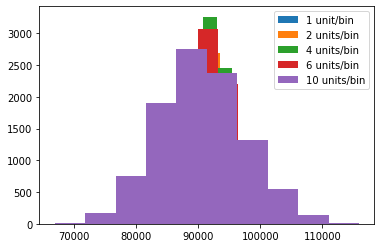

In [ ]:
x1 = null_chi1
x2 = null_chi2
x4 = null_chi4
x6 = null_chi6
x10 = null_chi10

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='1 unit/bin')
plt.hist(x2, bins=10, label='2 units/bin')
plt.hist(x4, bins=10, label='4 units/bin')
plt.hist(x6, bins=10, label='6 units/bin')
plt.hist(x10, bins= 10, label='10 units/bin')
ax.legend()
plt.show()

In [ ]:
def reverse_p_value(x, null_distrib):
    thing1 = x * 10000
    thing1 = int(thing1)
    null_distrib = np.sort(null_distrib)
    thing2 = null_distrib[(10000-thing1):10000]
    return thing2[0]

In [ ]:
def percent_sensitivity(num_seeds, num_clusters, num_counts, range, bckgd, dec, p, null_distrib, unitperbin):
    x = reverse_p_value(p, null_distrib)
    y = 0
    z = alt_chi_squared_distrib(num_seeds, num_clusters, num_counts, range, bckgd, dec, unitperbin)
    for item in z:
        if item > x:
            y = y + 1
    thing1 = y/num_seeds
    return thing1   

In [ ]:
def reverse_sensitivity(z, x, avgbkgd, dec, p, null_distrib, unitperbin):
    thing1 = np.arange(z, x)
    thing2 = np.array([])
    for item in thing1:
        thing3 = percent_sensitivity(10000, 1, item, 1, avgbkgd, dec, p, null_distrib, unitperbin)
        if thing3 > 0.9:
            thing2 = np.append(thing3, thing2)
    num = x - z
    num2 = len(thing2)
    if num2 == 0:
        num3 = 'None'
    else:
        num3 = num - num2 + z
    return num3

In [ ]:
reverse_sensitivity(65, 85, avg_bckgd1, data[4], 0.0013, null_chi1, 1)

84

In [ ]:
def lots_reverse_sensitivity(z, x, y, w):
    thing1 = np.array([])
    for item in 
    

In [ ]:
percent_sensitivity(1000, 1, 139, 1, avg_bckgd, data[4], 0.0013, null_chi4)

0.888

reverse_p_value(0.0013, null_chi)

In [ ]:
avg_bckgd

array([0.053 , 0.211 , 1.0719, ..., 3.1543, 1.6229, 0.4253])

In [ ]:
def p_value(x, null_distrib):
    thing1 = 0
    for item in null_distrib:
        if item > x:
            thing1 = thing1 + 1
    thing2 = thing1/10000
    return thing2

In [ ]:
def observed_values(thing1, thing2):
    
    xedges = np.linspace(0, 360, num=90)
    yedges = np.linspace(-90, 90, num=45)

    x = thing1
    y = thing2

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [ ]:
def real_chi_squared(thing1, thing2, a):
    b = observed_values(thing1, thing2)
    values = np.subtract(b, a)
    values = np.square(values)
    values = np.sum(values)
    return values

In [ ]:
chi = real_chi_squared(data[3], data[4], avg_bckgd)

In [ ]:
p_value(chi, null_chi)

0.1812

In [ ]:
def efficiency(x, y, null_chi, avg_bckgd, unitperbin):
    a = np.arange(x, y)
    b = np.array([])
    for item in a:
        c = percent_sensitivity(1000, 1, item, 1, avg_bckgd, data[4], 0.0013, null_chi, unitperbin)
        b = np.append(b, c)
    return b

In [ ]:
efficiency_vals1 = efficiency(1, 150, null_chi1, avg_bckgd1, 1)
efficiency_vals2 = efficiency(1, 150, null_chi2, avg_bckgd2, 2)
efficiency_vals4 = efficiency(1, 150, null_chi4, avg_bckgd4, 4)
efficiency_vals6 = efficiency(1, 150, null_chi6, avg_bckgd6, 6)
efficiency_vals10 = efficiency(1, 150, null_chi10, avg_bckgd10, 10)

In [ ]:
avg_bckgd1

array([0.053 , 0.211 , 1.0719, ..., 3.1543, 1.6229, 0.4253])

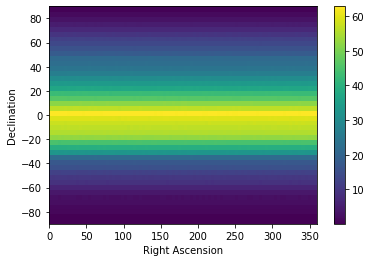

In [ ]:
xedges = np.linspace(0, 360, num=90)
yedges = np.linspace(-90, 90, num=45)

X, Y = np.meshgrid(xedges, yedges)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, avg_bckgd1.T)
#plt.ylim(-90, 0)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar(c)
plt.show()

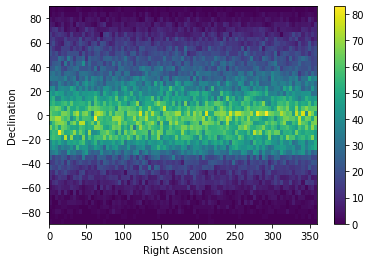

In [ ]:
xedges = np.linspace(0, 360, num=90)
yedges = np.linspace(-90, 90, num=45)

x = data[3]
y = data[4]

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
X, Y = np.meshgrid(xedges, yedges)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, H.T)
#plt.ylim(-90, 0)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar(c)
plt.show()

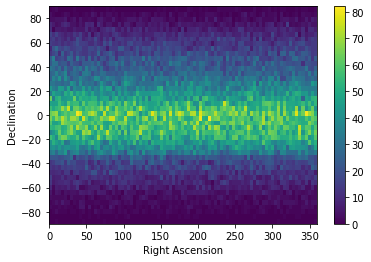

In [ ]:
xedges = np.linspace(0, 360, num=90)
yedges = np.linspace(-90, 90, num=45)

X, Y = np.meshgrid(xedges, yedges)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, null_vals.T)
#plt.ylim(-90, 0)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar(c)
plt.show()

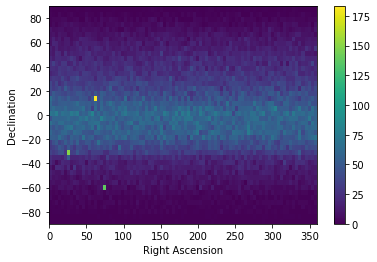

In [ ]:
xedges = np.linspace(0, 360, num=90)
yedges = np.linspace(-90, 90, num=45)

X, Y = np.meshgrid(xedges, yedges)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, alt_vals.T)
#plt.ylim(-90, 0)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar(c)
plt.show()

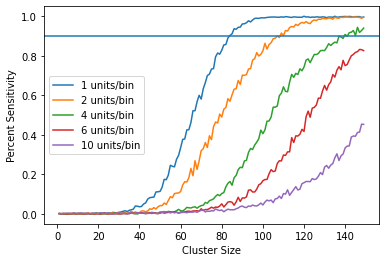

In [ ]:
x = np.arange(1, 150)
y1 = efficiency_vals1
y2 = efficiency_vals2
y4 = efficiency_vals4
y6 = efficiency_vals6
y10 = efficiency_vals10

fig, ax = plt.subplots()
plt.plot(x, y1, label='1 units/bin')
plt.plot(x, y2, label='2 units/bin')
plt.plot(x, y4, label='4 units/bin')
plt.plot(x, y6, label='6 units/bin')
plt.plot(x, y10, label='10 units/bin')
plt.xlabel('Cluster Size')
plt.ylabel('Percent Sensitivity')
ax.axhline(y=0.9)
ax.legend()
plt.show()